# Pandas 6

Pandas handles timestamps in a special way that makes it easy to work with time series. As this is particularly important for financial applications, this lecture will concentrate on time series processing.

We will look at:

* the datetime object,
* indexing and slicing by time,
* various operations on time series,
* and, time permitting, we'll build a trading simulator.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For time series analysis, we also need another module
from datetime import datetime

## Loading financial time series data

In [3]:
# Load daily stock values for AAPL
df = pd.read_csv('Pandas_6_data/aapl.csv', parse_dates=True).set_index('Date')
df[:5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,325.64,330.26,324.84,329.57,111284600,44.59
2011-01-04,332.44,332.50,328.15,331.29,77270200,44.82
2011-01-05,329.55,334.34,329.50,334.00,63879900,45.18
2011-01-06,334.72,335.25,332.90,333.73,75107200,45.15
2011-01-07,333.99,336.35,331.90,336.12,77982800,45.47


Pandas also provides convenience functions to get data directly from web sources. Here, let us get the data from Yahoo! Finance.

In [4]:
# Import the module for web downloads
# (You will need to install the package "pandas-datareader")
import pandas_datareader.data as web

# Specify start and end dates to download
start_date = datetime(2011, 1, 1) # January 1, 2011
end_date = datetime(2014, 1, 1)   # January 1, 2014

# Get Apple stock from Yahoo! Finance for these dates
df = web.DataReader('AAPL', 'yahoo', start_date, end_date)
df[:5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,325.640003,330.260002,324.840012,329.570000,111284600,43.337747
2011-01-04,332.439999,332.500000,328.149994,331.290012,77270200,43.563925
2011-01-05,329.549999,334.339989,329.500011,334.000008,63879900,43.920283
2011-01-06,334.719997,335.249996,332.900009,333.729988,75107200,43.884776
2011-01-07,333.989994,336.349995,331.900013,336.120003,77982800,44.199058


Note that this DataFrame has a special kind of index.

In [5]:
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2013-12-17', '2013-12-18', '2013-12-19', '2013-12-20',
               '2013-12-23', '2013-12-24', '2013-12-26', '2013-12-27',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name=u'Date', length=754, freq=None)

In [6]:
sixth_date = df.index[5]
sixth_date

Timestamp('2011-01-10 00:00:00')

In [7]:
# We can extract year, month, etc.
print sixth_date, 'corresponds to'
print 'year', sixth_date.year
print 'month', sixth_date.month
print 'day', sixth_date.day
print 'day of the week', sixth_date.dayofweek  # Monday=0, ..., Sunday=6
print 'quarter', sixth_date.quarter

2011-01-10 00:00:00 corresponds to
year 2011
month 1
day 10
day of the week 0
quarter 1


## Indexing in TimeSeries

We can index into this DataFrame using such Timestamp objects.

In [8]:
df.ix[sixth_date]

Open         3.388300e+02
High         3.432300e+02
Low          3.371700e+02
Close        3.424500e+02
Volume       1.121400e+08
Adj Close    4.503144e+01
Name: 2011-01-10 00:00:00, dtype: float64

In [9]:
df.ix['1/7/2011']

Open         3.339900e+02
High         3.363500e+02
Low          3.319000e+02
Close        3.361200e+02
Volume       7.798280e+07
Adj Close    4.419906e+01
Name: 2011-01-07 00:00:00, dtype: float64

In [10]:
df.ix['2011-01-05']

Open         3.295500e+02
High         3.343400e+02
Low          3.295000e+02
Close        3.340000e+02
Volume       6.387990e+07
Adj Close    4.392028e+01
Name: 2011-01-05 00:00:00, dtype: float64

In [11]:
df.ix[datetime(year=2011, month=1, day=5)]

Open         3.295500e+02
High         3.343400e+02
Low          3.295000e+02
Close        3.340000e+02
Volume       6.387990e+07
Adj Close    4.392028e+01
Name: 2011-01-05 00:00:00, dtype: float64

## Slicing in Time Series

We can also use any of the indexing methods above to select out slices of a time series.

In [12]:
df.ix['1/1/2013':'1/10/2013']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,553.819992,554.999992,541.630020,549.029976,140129500,72.837401
2013-01-03,547.879990,549.669991,540.999992,542.099991,88241300,71.918030
2013-01-04,536.969994,538.630005,525.829979,526.999992,148583400,69.914779
2013-01-07,521.999985,529.300018,515.199989,523.900002,121039100,69.503517
2013-01-08,529.209976,531.889984,521.250008,525.310020,114676800,69.690578
2013-01-09,522.500023,525.009987,515.990021,517.100006,101901100,68.601391
2013-01-10,528.549988,528.719978,515.519997,523.509979,150286500,69.451774


In addition, Pandas allows us to easily slice by month or year as well.

In [13]:
closings = df['Close']  # Select one column from our DataFrame; this is a Series
closings['2013-05']

Date
2013-05-01    439.290001
2013-05-02    445.519997
2013-05-03    449.980019
2013-05-06    460.709984
2013-05-07    458.660004
2013-05-08    463.839989
2013-05-09    456.769974
2013-05-10    452.969994
2013-05-13    454.740021
2013-05-14    443.860012
2013-05-15    428.850002
2013-05-16    434.580013
2013-05-17    433.260010
2013-05-20    442.930004
2013-05-21    439.659996
2013-05-22    441.349995
2013-05-23    442.139999
2013-05-24    445.150002
2013-05-28    441.440010
2013-05-29    444.949997
2013-05-30    451.580002
2013-05-31    449.730026
Name: Close, dtype: float64

In [14]:
closings['2012']

Date
2012-01-03    411.230000
2012-01-04    413.440010
2012-01-05    418.029995
2012-01-06    422.400002
2012-01-09    421.730000
2012-01-10    423.239994
2012-01-11    422.549992
2012-01-12    421.389992
2012-01-13    419.810009
2012-01-17    424.700001
2012-01-18    429.110008
2012-01-19    427.750004
2012-01-20    420.300007
2012-01-23    427.409996
2012-01-24    420.409996
2012-01-25    446.659996
2012-01-26    444.629990
2012-01-27    447.280010
2012-01-30    453.009995
2012-01-31    456.479980
2012-02-01    456.189987
2012-02-02    455.120003
2012-02-03    459.680000
2012-02-06    463.969978
2012-02-07    468.830009
2012-02-08    476.680016
2012-02-09    493.170006
2012-02-10    493.419998
2012-02-13    502.600021
2012-02-14    509.459991
                 ...    
2012-11-16    527.680008
2012-11-19    565.730011
2012-11-20    560.909981
2012-11-21    561.700012
2012-11-23    571.500023
2012-11-26    589.530022
2012-11-27    584.780006
2012-11-28    582.940018
2012-11-29    589.35

The general solution to slicing is to create a range of dates and select a slice using that range. There are many options:

* For calendar dates, use _date\_range()_, with a common case being:

   > date_range(start_date, end_date, freq)


* The "freq" can be:
    * 'D' for daily
    * 'B' for each business day
    * 'W-MON', 'W-TUE', ... for once a week on Monday, Tuesday, ...
    * 'M' for monthly
    * ...
    * 'WOM-3FRI' for third Friday of the month (usual for option expiry dates)

In [15]:
dates = pd.date_range(start='1/3/2013', end='2/3/2013', freq='W-TUE')
list(dates)

[Timestamp('2013-01-08 00:00:00', offset='W-TUE'),
 Timestamp('2013-01-15 00:00:00', offset='W-TUE'),
 Timestamp('2013-01-22 00:00:00', offset='W-TUE'),
 Timestamp('2013-01-29 00:00:00', offset='W-TUE')]

In [16]:
df.ix[dates]

,Open,High,Low,Close,Volume,Adj Close
2013-01-08,529.209976,531.889984,521.250008,525.310020,114676800,69.690578
2013-01-15,498.300003,498.990005,483.379982,485.920013,219193100,64.464878
2013-01-22,504.560013,507.879982,496.630005,504.770004,115386600,66.965624
2013-01-29,458.500000,460.200012,452.119987,458.269981,142789500,60.796670


## Shifting time series

One special operation with time series is to move backward or forward in time. For instance:

### What is the percentage daily change in closing price?

In [17]:
closes = df['Close']
closes[:10]

Date
2011-01-03    329.570000
2011-01-04    331.290012
2011-01-05    334.000008
2011-01-06    333.729988
2011-01-07    336.120003
2011-01-10    342.450001
2011-01-11    341.639996
2011-01-12    344.420006
2011-01-13    345.680008
2011-01-14    348.479992
Name: Close, dtype: float64

In [18]:
yesterdays_closes = closes.shift(1)
yesterdays_closes[:5]

Date
2011-01-03           NaN
2011-01-04    329.570000
2011-01-05    331.290012
2011-01-06    334.000008
2011-01-07    333.729988
Name: Close, dtype: float64

In [19]:
df['percent change'] = (closes / yesterdays_closes - 1) * 100
df['percent change'][:5]

Date
2011-01-03         NaN
2011-01-04    0.521896
2011-01-05    0.818013
2011-01-06   -0.080844
2011-01-07    0.716152
Name: percent change, dtype: float64

## Aggregate total trading volume by month

This is accomplished using the _resample()_ method. For example:

In [20]:
df['Volume'].resample('M', kind='period').sum()[:10]

Date
2011-01    2710383900
2011-02    2323987400
2011-03    2826614700
2011-04    2313457300
2011-05    1728015100
2011-06    2315962600
2011-07    2663486700
2011-08    4035649800
2011-09    2994362000
2011-10    3285356900
Freq: M, Name: Volume, dtype: int64

Let us understand the details of this function.

    df['Volume'].resample('M', kind='period').sum()

* This takes the Volume series, which is indexed on a daily basis,
* _"resamples"_ it on a monthly basis (the 'M'),
*  using the corresponding period as the index, e.g., the month '2011-01',
* and aggregates the volumes on all days in the month using the 'sum' function.

### Find the average closing price every week

In [21]:
df['Close'].resample('W', kind='period').mean()[:10]

Date
2011-01-03/2011-01-09    332.942002
2011-01-10/2011-01-16    344.534001
2011-01-17/2011-01-23    334.722508
2011-01-24/2011-01-30    340.401996
2011-01-31/2011-02-06    343.722003
2011-02-07/2011-02-13    355.326002
2011-02-14/2011-02-20    358.214004
2011-02-21/2011-02-27    343.067498
2011-02-28/2011-03-06    354.839999
2011-03-07/2011-03-13    352.449995
Freq: W-SUN, Name: Close, dtype: float64

## Moving averages

A common statistical technique is to smooth a time series by averaging over a time window. For example, a weekly moving average of a time series has, for each day, the average value of the time series over the previous week.

### Get the 30-day moving average

In [22]:
moving_avg_30 = df['Close'].rolling(window=30, min_periods=10).mean()
moving_avg_30[5:12]

Date
2011-01-10           NaN
2011-01-11           NaN
2011-01-12           NaN
2011-01-13           NaN
2011-01-14    338.738001
2011-01-18    338.911821
2011-01-19    338.905837
Name: Close, dtype: float64

What does this mean?

    df['Close'].rolling(window=30, min_periods=10).mean()

* **df['Close']**: use this time series

* **window=30**: take a window of closes over the past 30 days

* **min_periods=10**: If the past 30 days don't exist (say, today is the 25th day from the start of the time series), what do we do? This option says:
    * for the first 10 days of the time series, the moving average doesn't exist (NaN)
    * from the 10th to 30th day, take the average of as many days as are available (so for the 25th day, we average the past 25 days)
    * from the 30th day onwards, take the average of the past 30 days

* **mean()**: Compute the mean for this rolling window

### Plot the daily closes and the 30-day moving average

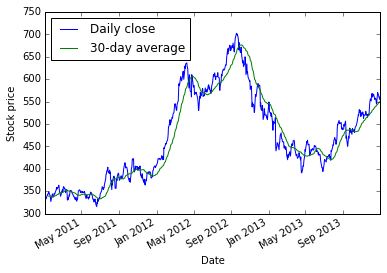

In [23]:
df['Close'].plot(label='Daily close')
df['Close'].rolling(window=30, min_periods=10).mean().plot(label='30-day average')
ylabel('Stock price')
legend(loc='best')
show()

Notice how the x-axis labels automatically say the name of the month, not the ugly "2011-05-01" stuff.

## Trading simulator

A common trading rule says: buy when the 30-day moving average goes above the 180-day moving average (the BUY rule), and sell when it goes below (the SELL rule).

Let us assume you buy 1 share at the closing price the very day the BUY rule triggers, and sell that 1 share the day the SELL rule triggers. (This is cheating a little because we need that day's closing price to compute the averages, but let's gloss over that.) At the end, we want the overall return.

How do we do this?

* Step 1: Compute the daily return ratio, i.e., the ratio of today's closing price to yesterday's closing price.
* Step 2: Create a mask of the days when I hold the share, i.e., the BUY rule has triggered, but the SELL rule has not.
* Step 3: Compute the cumulative return ratio over the days of the mask. This is the product of the return ratios on the days I hold the share.



**Step 1: Daily returns**

We've already seen this.

In [24]:
closes = df['Close']
daily_return_ratio = closes / closes.shift(1)
daily_return_ratio[:10]

Date
2011-01-03         NaN
2011-01-04    1.005219
2011-01-05    1.008180
2011-01-06    0.999192
2011-01-07    1.007162
2011-01-10    1.018833
2011-01-11    0.997635
2011-01-12    1.008137
2011-01-13    1.003658
2011-01-14    1.008100
Name: Close, dtype: float64

**Step 2: Mask of days when we hold share**

How do we do this?

* Compute the 30-day and 180-day moving averages

* Find the days when the 30-day average is greater than the 180-day average.

* On which days do I hold the share?

 Consider the following example:

* The 30-day average is greater than the 180-day average on 5th Jan, 6th Jan, ..., 11th Jan. It falls below the 180-day average on 12th Jan.

* So we buy the share at close of 5th Jan, sell at the close of 12th Jan.

* Hence we _held_ the share (and got its returns) for 6th Jan, 7th Jan, ..., 12th Jan.

* On which days do I hold the share?
    * The days we hold the share is shifted one day from the period the 30-day moving average is higher.

**Step 2: Mask of days when we hold share**

1. Compute the 30-day and 180-day moving averages
2. Find the days when the 30-day average is greater than the 180-day average.
3. The days we hold the share is shifted one day from the periods found in Step 2.

**Step 2.1:** Moving averages

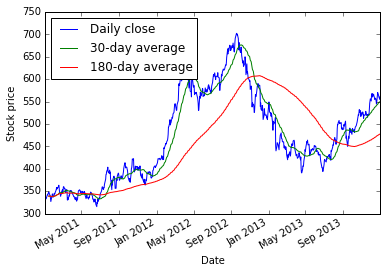

In [25]:
mavg_30 = closes.rolling(window=30, min_periods=10).mean()
mavg_180 = closes.rolling(window=180, min_periods=10).mean()

closes.plot(label='Daily close')
mavg_30.plot(label='30-day average')
mavg_180.plot(label='180-day average')
ylabel('Stock price')
legend(loc='best')
figsize(8,6)

**Step 2.2:** Find the days the 30-day average is greater.

In [26]:
mavg_30_is_greater = (mavg_30 > mavg_180)
mavg_30_is_greater['2011-02-08':'2011-02-22']

Date
2011-02-08    False
2011-02-09    False
2011-02-10    False
2011-02-11    False
2011-02-14    False
2011-02-15     True
2011-02-16     True
2011-02-17     True
2011-02-18     True
2011-02-22     True
Name: Close, dtype: bool

**Step 2.3:** Hold on the days the 30-day moving average is greater, but shifted by 1.

In [27]:
hold_days = mavg_30_is_greater.shift(1)
hold_days['2011-02-08':'2011-02-22']

Date
2011-02-08    False
2011-02-09    False
2011-02-10    False
2011-02-11    False
2011-02-14    False
2011-02-15    False
2011-02-16     True
2011-02-17     True
2011-02-18     True
2011-02-22     True
Name: Close, dtype: object

The story so far:

* We computed daily returns
* We computed the days on which we hold the share

What's left?

* Compute daily returns just on the days we hold the share
    * and take the product of these daily returns

In [28]:
# One little problem
hold_days[0:3]

Date
2011-01-03      NaN
2011-01-04    False
2011-01-05    False
Name: Close, dtype: object

The first date is NaN, because of the shift(). We cannot use hold_days as a mask for daily_return_ratio because the mask must contain only False or True. So let's fix it.

In [29]:
hold_days = hold_days.fillna(False)  # we don't hold shares on the first day
hold_days[0:3]

Date
2011-01-03    False
2011-01-04    False
2011-01-05    False
Name: Close, dtype: bool

Let's see the period when we hold the share

[]

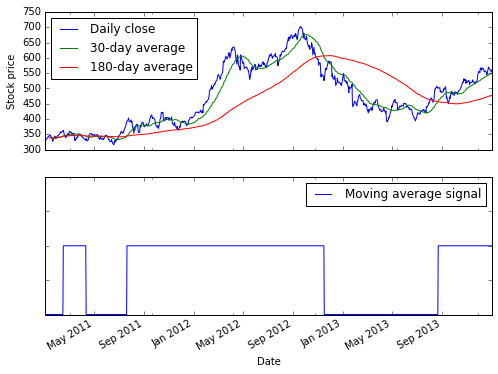

In [30]:
fig, (ax1, ax2) = subplots(nrows=2,
                           ncols=1,
                           sharex=True,
                           figsize=(8, 6))

closes.plot(ax=ax1, label='Daily close')
mavg_30.plot(ax=ax1, label='30-day average')
mavg_180.plot(ax=ax1, label='180-day average')
ax1.legend(loc='best')
ax1.set_ylabel('Stock price')

hold_days.plot(ax=ax2, ylim=[0,2], label='Moving average signal')
ax2.legend(loc='best')
ax2.yaxis.set_ticklabels([])

**Finally: Compute cumulative return**

In [31]:
# What are the returns on the days we hold the share?
s = daily_return_ratio[hold_days]
s[:5]

Date
2011-02-16    1.008975
2011-02-17    0.986699
2011-02-18    0.978398
2011-02-22    0.965912
2011-02-23    1.011843
Name: Close, dtype: float64

In [32]:
# Overall return is the product of the returns on each day we held a share.
print 'Overall return ratio =', s.prod()

Overall return ratio = 1.39983871441


Is this good? Let's compare to a buy-and-hold strategy, where we buy on the first day and sell on the last.

In [33]:
print 'Return of buy-and-hold =', daily_return_ratio.prod()

Return of buy-and-hold = 1.70227871772


Let's see how the cumulative return of the moving average strategy compares to buy-and-hold.

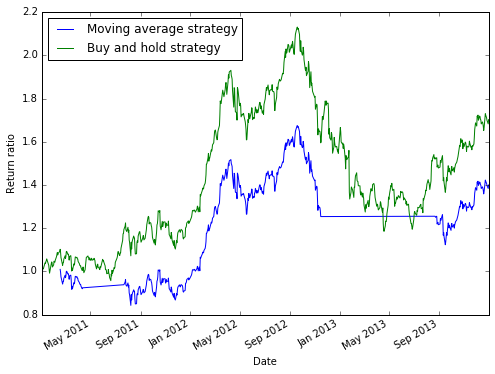

In [34]:
s.cumprod().plot(label='Moving average strategy')
daily_return_ratio.cumprod().plot(label='Buy and hold strategy')
ylabel('Return ratio')
legend(loc='best')
figsize(12,8)

* By the time the moving average strategy sells, the downturn has already hit hard.
* By the time it buys, prices have already gone up quite a bit.